In [351]:
%matplotlib inline

In [352]:
import torch
import matplotlib.pyplot as plt

In [353]:
x = torch.ones(100, 2)
x[:, 0].uniform_(-1, 1)
a = torch.tensor([3.0, 2.0])
y = x @ a + torch.rand(100);

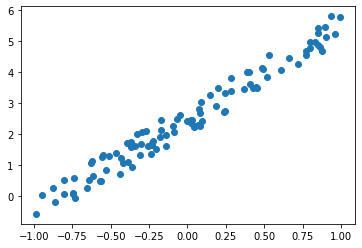

In [354]:
plt.scatter(x[:, 0], y);

In [355]:
# y_hat: predicted values, y: observed values
def mse(y_hat, y):
    return ((y_hat - y) ** 2).mean()

tensor(6.6889)


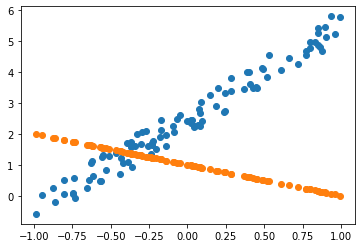

In [356]:
a = torch.tensor([-1.0, 1.0])
y_hat = x @ a
print(mse(y_hat, y))
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat);

In [357]:
def deriv_f(f, x, d=1.0e-4):
    return (f(x + d) - f(x)) / d

def deriv_mse_wrt_a1(x, a, y):
    f = lambda a1: mse(x @ torch.tensor([a1, a[1]]), y)
    return deriv_f(f, a[0])

def deriv_mse_wrt_a2(x, a, y):
    f = lambda a2: mse(x @ torch.tensor([a[0], a2]), y)
    return deriv_f(f, a[1])

def deriv_mse_wrt_a(x, a, y):
    return torch.tensor([
        deriv_mse_wrt_a1(x, a, y),
        deriv_mse_wrt_a2(x, a, y)
    ])

In [358]:
deriv_mse_wrt_a(x, a, y)

tensor([-2.2411, -2.9421])

In [359]:
a_new = a.clone()
lr = 1e-1
epochs = 100

def update():
    deriv_a = deriv_mse_wrt_a(x, a_new, y)
    a_new.sub_(lr * deriv_a)

fig = plt.figure()
plt.scatter(x[:, 0], y, c="red")
line, = plt.plot(x[:, 0], x @ a_new)
plt.close()

def animate(i):
    update()
    line.set_ydata(x @ a_new)
    return line,
    
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

anim = FuncAnimation(fig, animate, torch.arange(epochs), interval=20)
HTML(anim.to_jshtml())